In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import accuracy_score

In [5]:
iris = load_iris()
data = iris.data
target = iris.target
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [6]:
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
iris_df = pd.DataFrame(data, columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
iris_df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [10]:
iris_df["sepal length (cm)"].unique()

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

In [11]:
scaler = StandardScaler()
std = scaler.fit_transform(data)
std

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [14]:
# Agglomerative clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
y_pred = agg_clustering.fit_predict(std)
ac=accuracy_score(target,y_pred)
print("Accuracy Score - Agglomerative Hierarchical Clustering:", ac*100)

Accuracy Score - Agglomerative Hierarchical Clustering: 1.3333333333333335


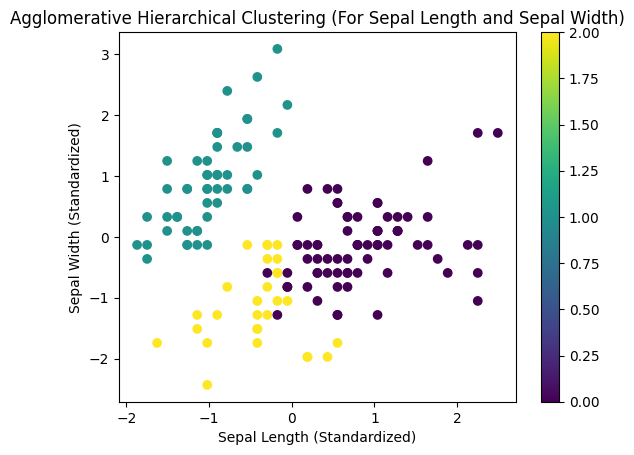

In [15]:
plt.scatter(std[:, 0], std[:, 1], c=y_pred)
plt.title('Agglomerative Hierarchical Clustering (For Sepal Length and Sepal Width)')
plt.xlabel('Sepal Length (Standardized)')
plt.ylabel('Sepal Width (Standardized)')
plt.colorbar()
plt.show()

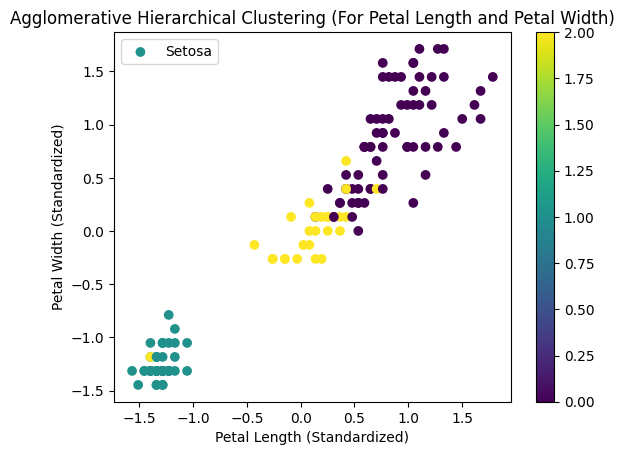

In [16]:
plt.scatter(std[:, 2], std[:, 3], c=y_pred,label = ["Setosa","Versicolor","Virginica"])
plt.title('Agglomerative Hierarchical Clustering (For Petal Length and Petal Width)')
plt.xlabel('Petal Length (Standardized)')
plt.ylabel('Petal Width (Standardized)')
plt.colorbar()
plt.legend(["Setosa","Versicolor","Virginica"])
plt.show()

In [17]:
z = linkage(std, method='ward')
z

array([[1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [7.00000000e+00, 3.90000000e+01, 1.21167870e-01, 2.00000000e+00],
       [1.00000000e+01, 4.80000000e+01, 1.21167870e-01, 2.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 1.31632184e-01, 2.00000000e+00],
       [9.00000000e+00, 3.40000000e+01, 1.31632184e-01, 2.00000000e+00],
       [1.28000000e+02, 1.32000000e+02, 1.31632184e-01, 2.00000000e+00],
       [1.27000000e+02, 1.38000000e+02, 1.33836265e-01, 2.00000000e+00],
       [2.00000000e+00, 4.70000000e+01, 1.33836265e-01, 2.00000000e+00],
       [1.90000000e+01, 4.60000000e+01, 1.43378956e-01, 2.00000000e+00],
       [8.00000000e+01, 8.10000000e+01, 1.43378956e-01, 2.00000000e+00],
       [1.00000000e+00, 2.50000000e+01, 1.66143388e-01, 2.00000000e+00],
       [1.20000000e+02, 1.43000000e+02, 1.66143388e-01, 2.00000000e+00],
       [1.10000000e+01, 2.40000000e+01, 1.70512281e-01, 2.00000000e+00],
       [4.00000000e+01, 1.53000000e+02, 1.72216546e

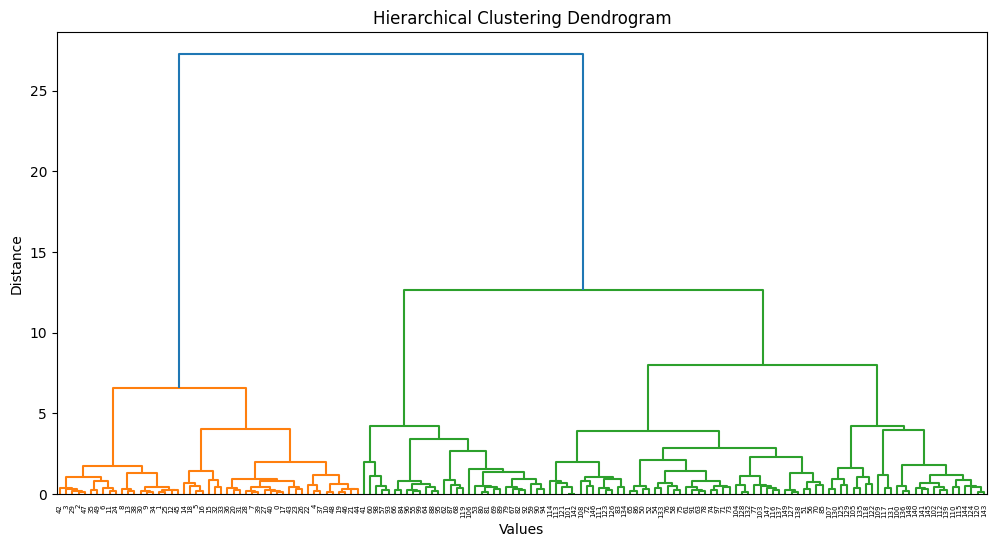

In [33]:
plt.figure(figsize=(12, 6))
dendrogram(z)
plt.xlabel('Values')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


In [ ]:
#K-means

In [22]:
from sklearn.cluster import KMeans

In [26]:
cluster_sizes = range(1, 150)
sse = []
for k in cluster_sizes:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(std)
    sse.append(kmeans.inertia_)

In [24]:
sse

[600.0000000000001,
 222.36170496502302,
 191.7486021312638,
 114.50455255866582,
 90.84834103079314,
 82.35444393266246,
 73.30321215015007,
 62.611923378653515,
 60.3930298722556,
 53.4128377818629,
 48.36893697581759,
 41.10694654107595,
 40.53082544667639,
 38.77716595947042,
 34.654498651713794,
 33.36673467545339,
 33.43934639022973,
 28.526015765443027,
 27.17296727058856,
 26.019261979810828,
 24.777337180548756,
 22.969962025112068,
 23.946234225428636,
 23.074510346305455,
 20.97487361268347,
 20.31661533810385,
 19.657378055587884,
 18.05914208208375,
 17.935653338462707,
 17.34375131167908,
 15.354609196671664,
 15.004731484623601,
 14.608402044334053,
 14.449824575453281,
 13.72600779020765,
 13.549607818805143,
 12.754657760990543,
 12.497891689526229,
 12.052567709420606,
 11.776868332216491,
 10.464295287789106,
 11.025588479179223,
 11.666358407608435,
 10.29314420534029,
 9.750083001825917,
 9.745017391645217,
 9.071305605454924,
 9.179704772350345,
 8.547462345970015

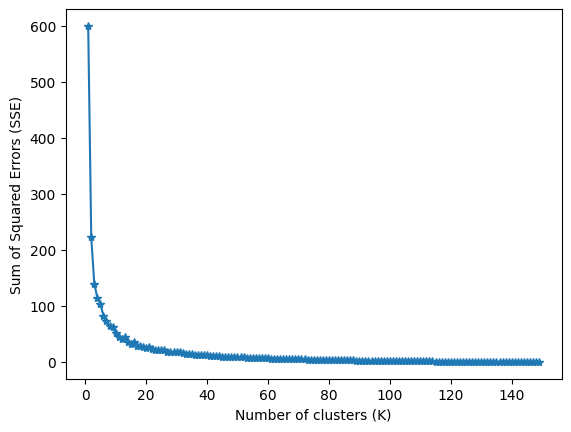

In [27]:
plt.plot(cluster_sizes, sse, marker='*')

plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

In [28]:
cluster_sizes = range(1, 10)
sse = []
for k in cluster_sizes:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(std)
    sse.append(kmeans.inertia_)

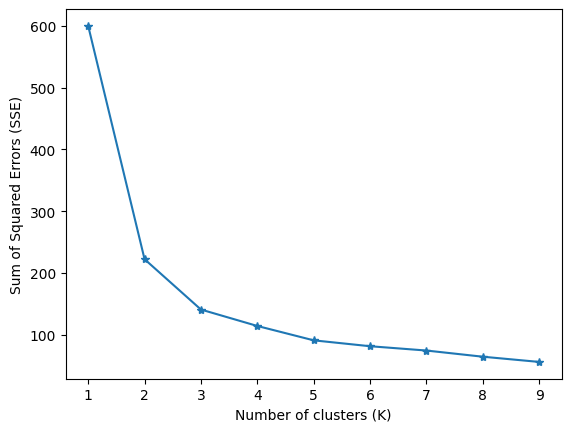

In [29]:
plt.plot(cluster_sizes, sse, marker='*')

plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

In [31]:
k_opt = KMeans(n_clusters=3)
k_opt.fit(std)

KMeans(n_clusters=3)

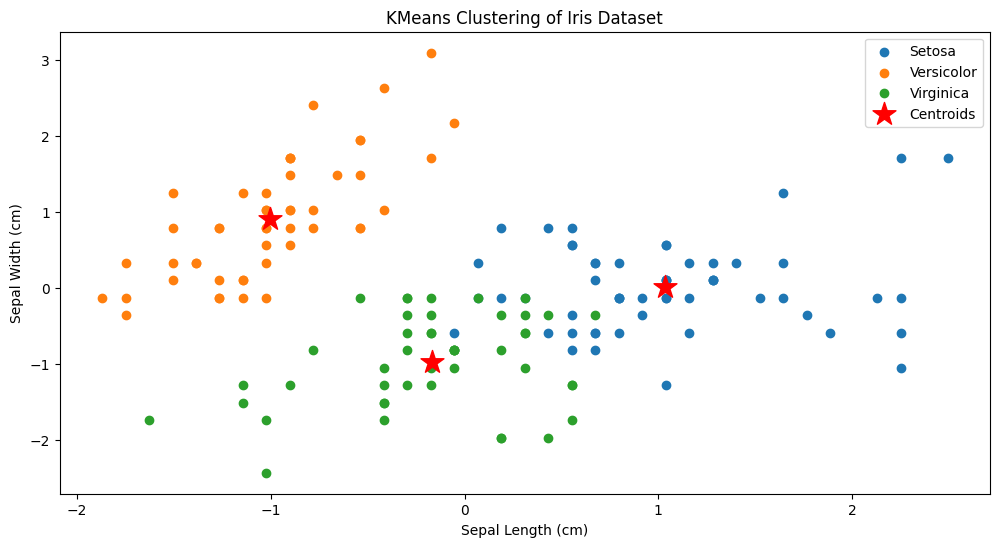

In [45]:

plt.figure(figsize=(12, 6))
cluster_names = {0: "Setosa", 1: "Versicolor", 2: "Virginica"}

for i in range(optimal_k):
    plt.scatter(std[k_opt.labels_ == i, 0], std[k_opt.labels_ == i, 1],label=cluster_names[i])

plt.scatter(k_opt.cluster_centers_[:, 0], k_opt.cluster_centers_[:, 1], s=300, c='red', marker='*', label='Centroids')
plt.title('KMeans Clustering of Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

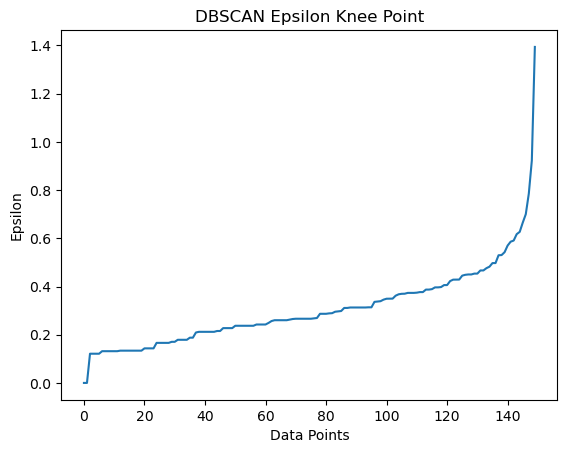

In [63]:
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(std)
distances, indices = neighbors_fit.kneighbors(std)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.xlabel('Data Points')
plt.ylabel('Epsilon')
plt.title('DBSCAN Epsilon Knee Point')
plt.show()


In [ ]:
DBSCAN

In [40]:
nn = NearestNeighbors(n_neighbors=2)
nn.fit(std)
distances, _ = nn.kneighbors(std)
distances = np.sort(distances[:,1])

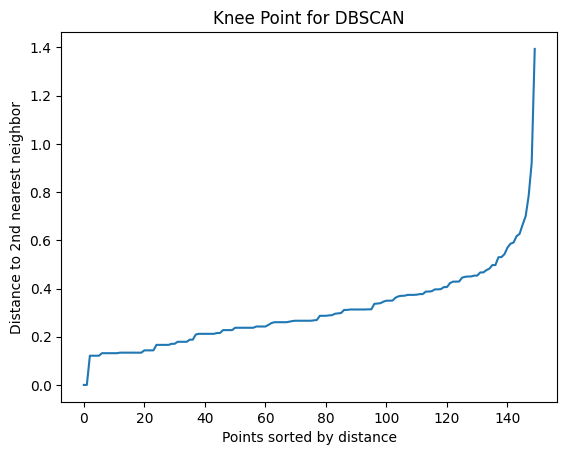

In [42]:
plt.plot(distances)
plt.xlabel("Points sorted by distance")
plt.ylabel("Distance to 2nd nearest neighbor")
plt.title("Knee Point for DBSCAN")
plt.show()

In [43]:
eps = 0.8
min_samples = 5
metric = 'euclidean'

dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric="euclidean")
labels = dbscan.fit_predict(std)

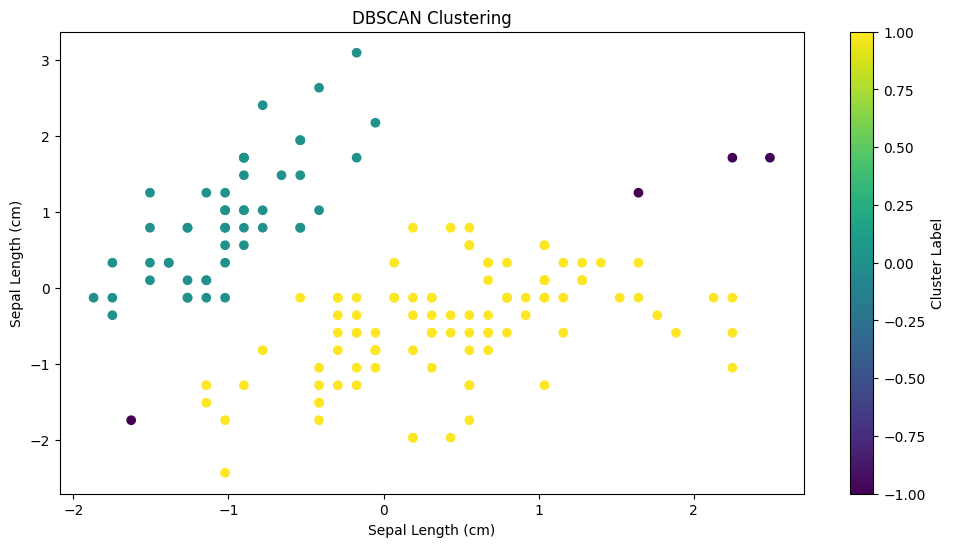

In [49]:
plt.figure(figsize=(12, 6))
cluster_names = {0: "Setosa", 1: "Versicolor", 2: "Virginica"}
plt.scatter(std[:,0], std[:,1], c=labels,label=cluster_names[i])
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Length (cm)")
plt.title("DBSCAN Clustering")
plt.colorbar(label="Cluster Label")
plt.show()
